# Linear regression

Task to predict the car price based on the features of the car.

Column MSRP manufacter's suggested retail price is the target variable.

In [49]:
import pandas as pd
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [50]:
car_data = pd.read_csv('./data/cardataset/data.csv')

<Axes: xlabel='Year', ylabel='MSRP'>

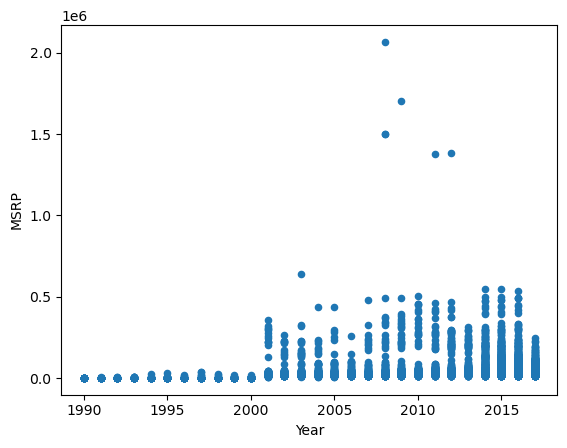

In [51]:
car_data.plot(x='Year', y='MSRP', kind='scatter')

In [52]:
X = car_data.drop("MSRP", axis=1) 
y = car_data["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Get the numerical features and the categorical features of the dataset
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])


# Convert the categorical features to one-hot encoded features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create the preprocessor stage of final pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 3648.9361411356253
Mean Squared Error: 104526791.63821867
R2 Score: 0.956146959152283


The R² score of 0.956 indicates that 95.6% of the variance in the MSRP values can be explained by the features used in the model. This high R² value suggests that the model provides a good fit to the data, though further checks on overfitting or generalization are necessary.

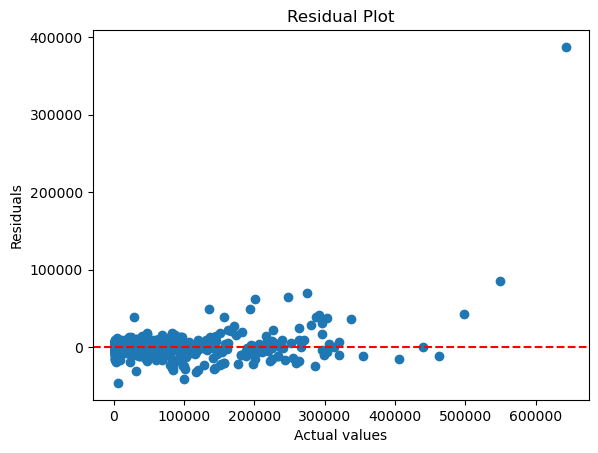

In [53]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<Axes: xlabel='Year', ylabel='MSRP'>

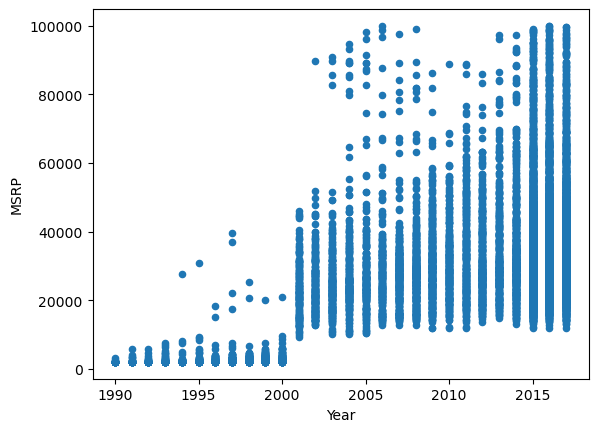

In [54]:
# create second model after removing the outliers

# removing the outliers
car_data = car_data[car_data['MSRP'] < 100000]

car_data.plot(x='Year', y='MSRP', kind='scatter')


In [56]:
car_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [55]:
X = car_data.drop("MSRP", axis=1) 
y = car_data["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Get the numerical features and the categorical features of the dataset
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])


# Convert the categorical features to one-hot encoded features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create the preprocessor stage of final pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 2530.05898608276
Mean Squared Error: 14017619.898640646
R2 Score: 0.9621111550857401


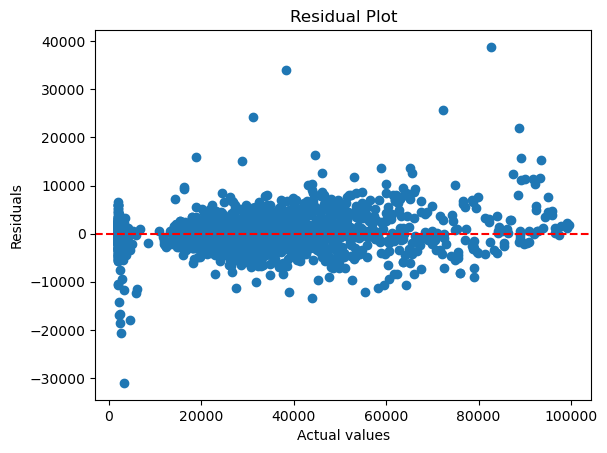

In [57]:
# residual plot
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
